In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [11]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv"  # Adjust filename if necessary
df = pd.read_csv(file_path)

# Quick inspection
print(df.head())
print(df.info())




   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Po

In [12]:
# Define new column names
column_names = ['id', 'entity', 'sentiment', 'tweet_text']

# Assign column names to the dataset
df.columns = column_names

# Verify the new column names
print(df.head())


     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                          tweet_text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


# **Analyze Sentiment Patterns** 

In [18]:
# Define a robust text-cleaning function
def clean_text(text):
    try:
        text = re.sub(r"http\S+", "", text)       # Remove URLs
        text = re.sub(r"@\w+", "", text)          # Remove mentions
        text = re.sub(r"[^\w\s]", "", text)       # Remove punctuation
        text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
        return text.lower()                       # Convert to lowercase
    except Exception as e:
        return ""  # Return an empty string for problematic values

# Apply the function
df['cleaned_text'] = df['tweet_text'].apply(clean_text)


In [19]:
# Check for cleaned text
print(df[['tweet_text', 'cleaned_text']].head())

# Check if there are still problematic values
print(df['cleaned_text'].isnull().sum())


                                          tweet_text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                        cleaned_text  
0  i am coming to the borders and i will kill you...  
1  im getting on borderlands and i will kill you all  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
0


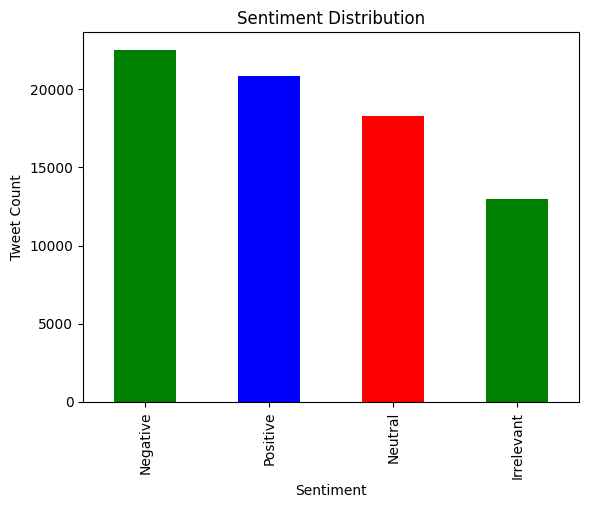

In [15]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


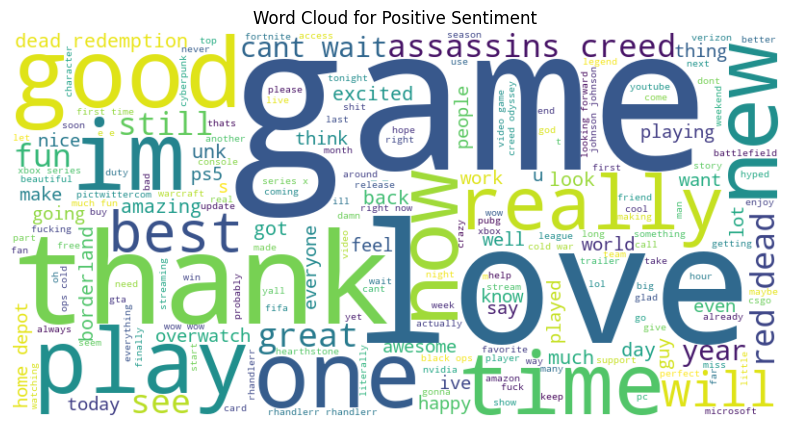

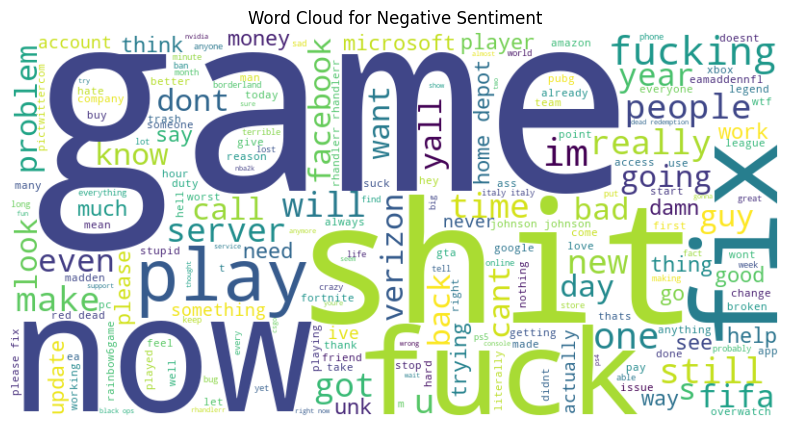

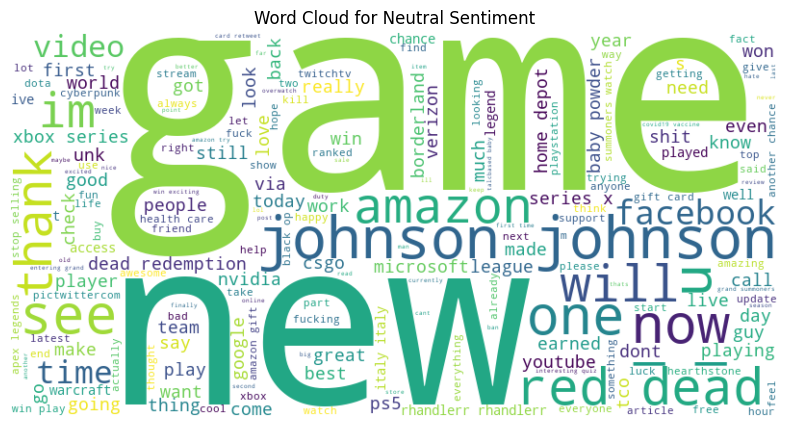

In [20]:
from wordcloud import WordCloud

# Function to generate a word cloud for a specific sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')


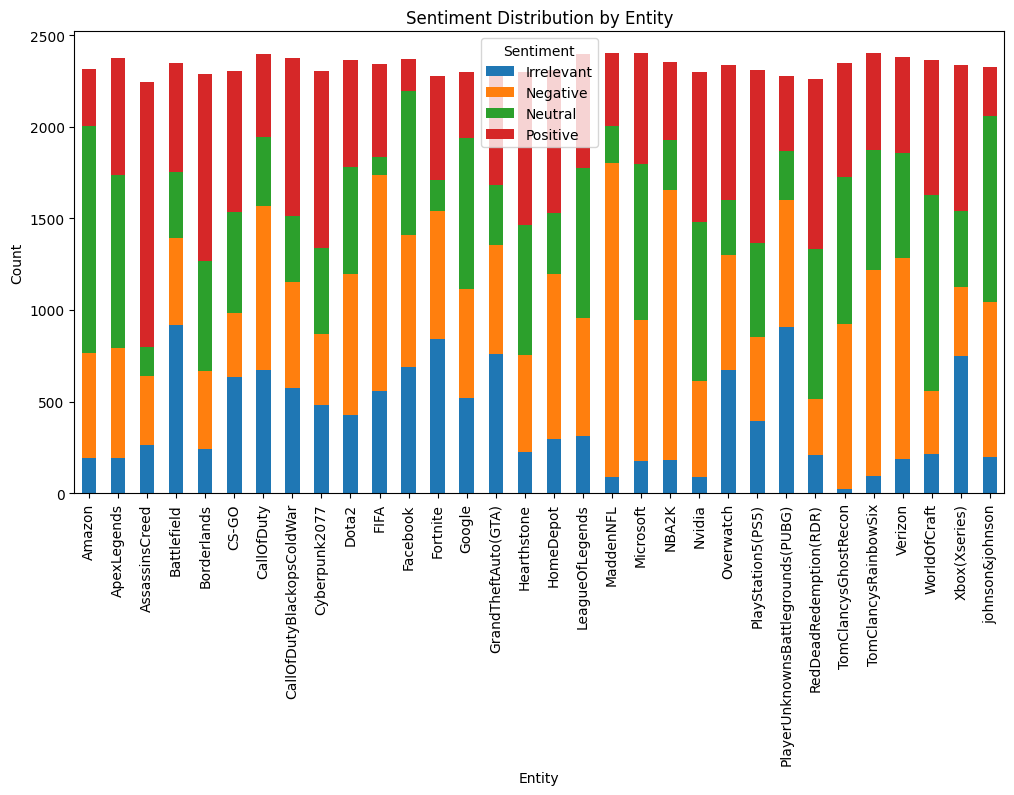

In [21]:
# Group by 'entity' and 'sentiment'
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack(fill_value=0)

# Plot entity sentiment distribution
entity_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


In [24]:
from collections import Counter

# Function to get the top N most common words
def get_top_words(sentiment, n=10):
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    words = text.split()
    counter = Counter(words)
    return counter.most_common(n)

# Get top 10 words for each sentiment
print("Top words for Positive sentiment:", get_top_words('Positive'))
print("Top words for Negative sentiment:", get_top_words('Negative'))
print("Top words for Neutral sentiment:", get_top_words('Neutral'))


Top words for Positive sentiment: [('the', 11803), ('i', 9112), ('to', 7665), ('and', 6908), ('a', 5917), ('of', 5113), ('is', 4500), ('for', 4380), ('this', 4255), ('it', 4015)]
Top words for Negative sentiment: [('the', 14017), ('i', 10089), ('to', 9082), ('and', 8629), ('a', 7482), ('is', 6823), ('of', 5746), ('this', 4909), ('in', 4781), ('it', 4777)]
Top words for Neutral sentiment: [('the', 10630), ('to', 7164), ('and', 6358), ('a', 5940), ('i', 5536), ('of', 4939), ('for', 3997), ('in', 3986), ('is', 3360), ('on', 3214)]
